![](https://admisiones.udemedellin.edu.co/wp-content/uploads/2021/01/logo-udemedellin.png)

---

# **Ray Tracing in the propagation of seismic waves using homotopy and continuation method**

In [14]:
import sys
sys.path.append('../source')

import numpy as np

from ray_surface import *
from HomotopyConstructions import *

In [15]:
import sympy as sp

media_trail = [1, 2, 3, 4, 4, 3, 2, 1]
interfaces = [0, 1, 2, 3, 4, 3, 2, 1, 0]
medium_velocities = { 'P':[2.44, 5.38, 7.50, 9.8],
                      'S':[1.71, 3.44, 5.6, 8.2] }

x = sp.symbols('x')
#interface_functions = [ 0*x, x*( (x/10)**2 - 1 ) - 5, -10*( (x/10)**2 + 1 ) ]

interface_functions = [ 0*x, 1.0 + 0*x, 2 + 0*x, 7 + 0*x, 9 + 0*x ]

myRay = Ray(media_trail, interfaces)
mySurface = Surface(interface_functions, myRay, medium_velocities)

mySurface.get_cases()

[['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'S'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'S', 'P'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'S', 'S'],
 ['P', 'P', 'P', 'P', 'P', 'S', 'P', 'P'],
 ['P', 'P', 'P', 'P', 'P', 'S', 'P', 'S'],
 ['P', 'P', 'P', 'P', 'P', 'S', 'S', 'P'],
 ['P', 'P', 'P', 'P', 'P', 'S', 'S', 'S'],
 ['P', 'P', 'P', 'P', 'S', 'P', 'P', 'P'],
 ['P', 'P', 'P', 'P', 'S', 'P', 'P', 'S'],
 ['P', 'P', 'P', 'P', 'S', 'P', 'S', 'P'],
 ['P', 'P', 'P', 'P', 'S', 'P', 'S', 'S'],
 ['P', 'P', 'P', 'P', 'S', 'S', 'P', 'P'],
 ['P', 'P', 'P', 'P', 'S', 'S', 'P', 'S'],
 ['P', 'P', 'P', 'P', 'S', 'S', 'S', 'P'],
 ['P', 'P', 'P', 'P', 'S', 'S', 'S', 'S'],
 ['P', 'P', 'P', 'S', 'P', 'P', 'P', 'P'],
 ['P', 'P', 'P', 'S', 'P', 'P', 'P', 'S'],
 ['P', 'P', 'P', 'S', 'P', 'P', 'S', 'P'],
 ['P', 'P', 'P', 'S', 'P', 'P', 'S', 'S'],
 ['P', 'P', 'P', 'S', 'P', 'S', 'P', 'P'],
 ['P', 'P', 'P', 'S', 'P', 'S', 'P', 'S'],
 ['P', 'P', 'P', 'S', 'P', 'S', 'S', 'P'],
 ['P', 'P',

In [18]:
xs, xr = -2, 10
all_points = 9

x_test = xs + np.arange(all_points) * ( xr - xs ) / ( all_points-1 )


mySystem = SystemBuilder(x_test, mySurface)

interest_cases = [['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
                  ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']]

x_test

array([-2. , -0.5,  1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. ])

In [19]:
sol = mySystem.newton_solve(interest_cases, tol=1e-3)
sol

LinAlgError: Singular matrix

In [37]:
y = np.array([0, 1, 2, 7, 9, 7, 2, 1, 0])

In [34]:
import matplotlib.pyplot as plt

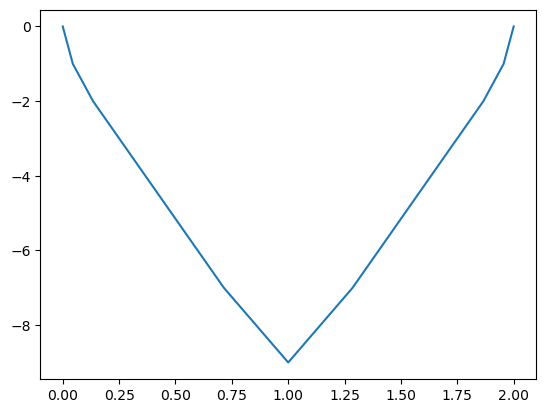

In [38]:
plt.plot(sol, -y)

In [25]:
sol[1] - sol[0]

62.33750738507018

In [26]:
sol[-1] - sol[-2]

62.33750738507038